In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


if any error ocurs while importing istall libraries using pip eg: pip install numpy

import data set

In [3]:
data =pd.read_csv('../artifacts/sentiment_analysis.csv')

view first 5 rows

In [4]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data Preprocessing

In [5]:
data.shape

(7920, 3)

check any duplicated rows

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

Convert uppercase to lowercase

remove linke

remove punctuations

remove numbers

remove stopwords eg:(and, the bt is in about these words have no meaning when get as single word)

stemming (eg: Creating , creative, created, creates ---> create is the base word for all above words that time we can get only create)

### import libraries for text pre processing

In [8]:
# re---> Regulaer regression
import re
import string

#### convert uppercase to lowercase

In [9]:
data["tweet"]=data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data["tweet"].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#### remove link

In [11]:
data["tweet"]=data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [12]:
data["tweet"].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#### remove punctuations

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text =text.replace(punctuation, '')
    return text
data["tweet"]=data["tweet"].apply(remove_punctuations)

In [15]:
data["tweet"].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

#### remove numbers

In [16]:
data["tweet"]= data['tweet'].str.replace('\d+','',regex=True)

In [17]:
data["tweet"].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

#### remove stopwords

  install natural language toolkit to identify stopwords

In [18]:
!pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import nltk

In [20]:
nltk.download('stopwords',download_dir='../static/model/')

[nltk_data] Downloading package stopwords to ../static/model/...
[nltk_data]   Package stopwords is already up-to-date!


True

getting stopwords

In [21]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw =file.read().splitlines()

In [22]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

##### remove stopwords

In [23]:
data['tweet']=data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [24]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


#### stemming

In [25]:
from nltk.stem import PorterStemmer
ps= PorterStemmer()

In [26]:
data['tweet'] =data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [27]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...


In [28]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


Then we have to convert this text to vocabulary

next do vectorization

### Building Vacabulary

In [29]:
from collections import Counter
vocab=Counter()

In [30]:
vocab

Counter()

Update Vocabulary using data['tweet']

In [31]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [32]:
len(vocab)

15949

In [33]:
data.shape

(7920, 3)

lenth of vocabulary = features(15949) but row count = 7920 therfore features count> row therfor model can be overfit
therefore we use feature selection or we can remove features that word count <10

In [34]:
tokens =[key for key in vocab if vocab[key] >10]

In [35]:
len(tokens)

1145

In [36]:
def save_vocabulary(lines, filename):
    data= '\n'.join(lines)
    file=open(filename,'w', encoding="utf-8")
    file.write(data)
    file.close()
save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Divide dataset

In [37]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [38]:
x=data['tweet']
y=data['label']

In [39]:
x

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [40]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [41]:
import sklearn
print(sklearn.__version__)

1.2.2


In [42]:

from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

In [44]:
x_train.shape

(6336,)

In [45]:
x_test

1322    kid sublim much zeta suppli click link … iphon...
3626                  ye real flagship phone market nokia
4790        new phone new case new buddi thank gs samsung
1100    twitter stupid ipod keep crash good job tweetd...
7198    small fast — steemit … fast bug bug natur natu...
                              ...                        
2543    got ipod touch itun download wont work happens...
5816    tripl selfi label meet shakeshack soni rca mus...
731     nba player bryce dejeanjones… news photographi...
1170    bravo make ‘odd mom out’ season … news photogr...
6439    tropic girl enjoy beach ヽ。ノ beach free jogja t...
Name: tweet, Length: 1584, dtype: object

In [46]:
x_test.shape

(1584,)

In [47]:
y_test.shape

(1584,)

In [48]:
y_test

1322    0
3626    1
4790    0
1100    1
7198    0
       ..
2543    1
5816    0
731     0
1170    0
6439    0
Name: label, Length: 1584, dtype: int64

In [49]:
def vectorizer(ds, vocabulary):
    vectorized_lst =[]
    
    for sentence in ds:
        sentence_list=np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i]=1
        
        vectorized_lst.append(sentence_list)
    
    vectorized_lst_new= np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new
        

In [50]:
vectorized_x_train=vectorizer(x_train, tokens)

In [51]:
vectorized_x_test=vectorizer(x_test, tokens)

In [52]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
y_train.value_counts()

label
0    4726
1    1610
Name: count, dtype: int64

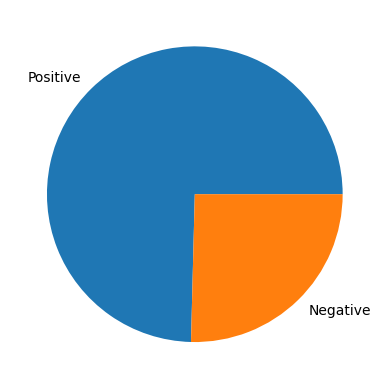

In [54]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

according to above chart you can seet dataset is unbalance

### Handle Inbalnced Dataset 

In [55]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
from imblearn.over_sampling import SMOTE
smote =SMOTE()
vectorized_x_train_smote,y_train_smote=smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape,y_train_smote.shape)

(9452, 1145) (9452,)


In [57]:
y_train_smote.value_counts()

label
0    4726
1    4726
Name: count, dtype: int64

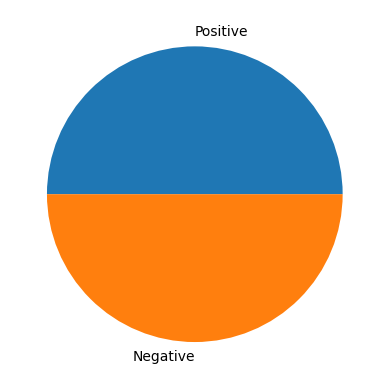

In [58]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

## Model Training and Evaluation

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_score(y_act,y_pred):
    acc=round(accuracy_score(y_act,y_pred),4)
    pr=round(precision_score(y_act,y_pred),4)
    rec=round(recall_score(y_act,y_pred),4)
    f1=round(f1_score(y_act,y_pred),4)
    print(f'Training Score:\n\tAccuracy= {acc}\n\tPrecision={pr}\n\tRecall= {rec}\n\tF1-Score= {f1}')
    
def validaion_score(y_act,y_pred):
    acc=round(accuracy_score(y_act,y_pred),4)
    pr=round(precision_score(y_act,y_pred),4)
    rec=round(recall_score(y_act,y_pred),4)
    f1=round(f1_score(y_act,y_pred),4)
    print(f'Training Score:\n\tAccuracy= {acc}\n\tPrecision={pr}\n\tRecall= {rec}\n\tF1-Score= {f1}')
        

### Logistic Regression

In [61]:
lr=LogisticRegression()

lr.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=lr.predict(vectorized_x_train_smote)

training_score(y_train_smote,y_train_pred)

y_test_pred=lr.predict(vectorized_x_test)

validaion_score(y_test,y_test_pred)

Training Score:
	Accuracy= 0.9414
	Precision=0.917
	Recall= 0.9706
	F1-Score= 0.9431
Training Score:
	Accuracy= 0.8611
	Precision=0.7
	Recall= 0.8245
	F1-Score= 0.7572


In [62]:
## We can see testing accuracy <<<< training accuracy 
### Therefore model can be overfit..........................
#### for overcome this problem we can increease dataset or we can decrease features

## Naive Bayes

In [63]:
nb=MultinomialNB()

nb.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=nb.predict(vectorized_x_train_smote)

training_score(y_train_smote,y_train_pred)

y_test_pred=nb.predict(vectorized_x_test)

validaion_score(y_test,y_test_pred)

Training Score:
	Accuracy= 0.9062
	Precision=0.8706
	Recall= 0.9541
	F1-Score= 0.9104
Training Score:
	Accuracy= 0.8479
	Precision=0.656
	Recall= 0.8846
	F1-Score= 0.7533


## Decision Tree

In [64]:
dt=DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=dt.predict(vectorized_x_train_smote)

training_score(y_train_smote,y_train_pred)

y_test_pred=dt.predict(vectorized_x_test)

validaion_score(y_test,y_test_pred)

Training Score:
	Accuracy= 0.9996
	Precision=1.0
	Recall= 0.9992
	F1-Score= 0.9996
Training Score:
	Accuracy= 0.8194
	Precision=0.6757
	Recall= 0.601
	F1-Score= 0.6361


## RandomForest

In [65]:
rfc=RandomForestClassifier()

rfc.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=rfc.predict(vectorized_x_train_smote)

training_score(y_train_smote,y_train_pred)

y_test_pred=rfc.predict(vectorized_x_test)

validaion_score(y_test,y_test_pred)

Training Score:
	Accuracy= 0.9996
	Precision=0.9996
	Recall= 0.9996
	F1-Score= 0.9996
Training Score:
	Accuracy= 0.858
	Precision=0.7533
	Recall= 0.6827
	F1-Score= 0.7163


## Support Vector Machine

In [66]:
svc=SVC()

svc.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=svc.predict(vectorized_x_train_smote)

training_score(y_train_smote,y_train_pred)

y_test_pred=svc.predict(vectorized_x_test)

validaion_score(y_test,y_test_pred)

Training Score:
	Accuracy= 0.9776
	Precision=0.9616
	Recall= 0.9949
	F1-Score= 0.978
Training Score:
	Accuracy= 0.8662
	Precision=0.7287
	Recall= 0.7812
	F1-Score= 0.7541


In [67]:
import pickle
with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr,file)